In [1]:
#install tensorflow
!pip install tensorflow

     -------------------------------------- 284.1/284.1 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 8.1 MB/s eta 0:00:00
     -------------------------------------- 938.4/938.4 kB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 9.5 MB/s eta 0:00:00
     -------------------------------------- 413.2/413.2 kB 8.6 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 7.5 MB/s eta 0:00:00
     ------------------------------------- 440.7/4


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#install keras
!pip install keras


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [4]:
# Cargar y procesar el conjunto de datos CIFAR10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 53s 0us/step


In [5]:
# construir la arquitectura de la red neuronal
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [6]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.5562 - accuracy: 0.4285 - val_loss: 1.2710 - val_accuracy: 0.5380
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1789 - accuracy: 0.5834 - val_loss: 1.1186 - val_accuracy: 0.6111
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0144 - accuracy: 0.6457 - val_loss: 1.0512 - val_accuracy: 0.6330
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9134 - accuracy: 0.6790 - val_loss: 0.9718 - val_accuracy: 0.6591
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8499 - accuracy: 0.7010 - val_loss: 0.8757 - val_accuracy: 0.6965
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7935 - accuracy: 0.7196 - val_loss: 0.8594 - val_accuracy: 0.6989
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7398 - accuracy: 0.7409 - val_loss: 0.8595 -

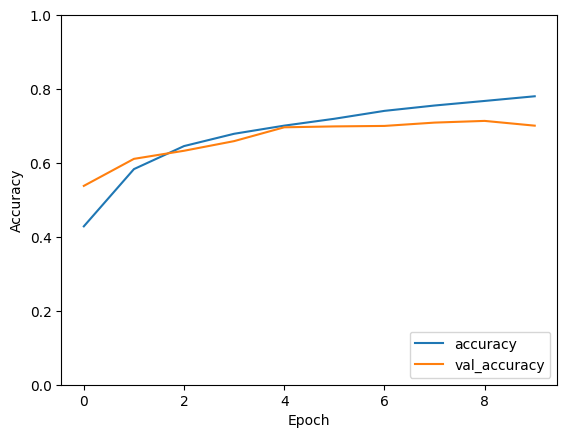

In [8]:
# Visualizar la precisión de entrenamiento y validación por época
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()